# Консультация по питону

## Функции

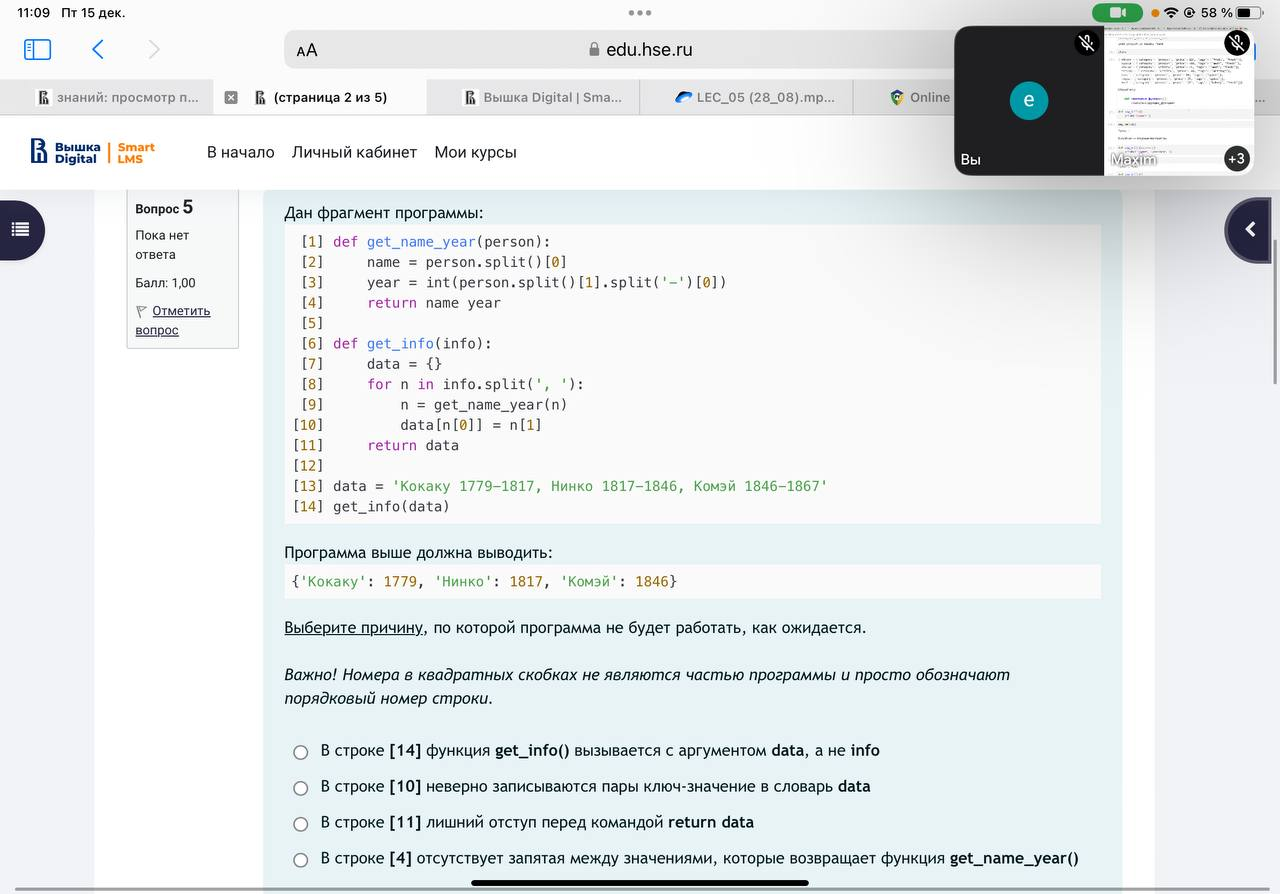

Функция `get_name_year()` для строки типа `"Нинко 1817-1846"` выдаёт отдельно имя и первый год до дефиса `"Нинко", 1817` (это кортеж на самом деле)

Точнее, выдаёт если её исправить. В `return` не хватало запятой между `name` и `age`

In [113]:
# пример: в функции принимается строка, из которой извлекаются имя и возраст.
# Она их возвращает (это будет кортеж из двух элементов)

def get_name_age():
    inp = input("Ваше имя и возраст через пробел: ")
    elements = inp.split()
    name = elements[0]
    age = elements[1]

    return name, age

In [8]:
result = get_name_age()

print(type(result), result)

Ваше имя и возраст через пробел:  Максим 23


<class 'tuple'> ('Максим', '23')


исходно, без запятой:

In [114]:
def get_name_year(person):
    name = person.split()[0]
    year = int(person.split()[1].split("-")[0])
    return name year

SyntaxError: invalid syntax (3439434951.py, line 4)

In [12]:
def get_name_year(person):
    name = person.split()[0]
    year = int(person.split()[1].split("-")[0])
    return name, year

с запятой всё работает


In [14]:
get_name_year("Нинко 1817-1846")

('Нинко', 1817)

выдаётся кортеж, первый элемент — имя, второй — год

In [21]:
n = ('Нинко', 1817)
print(n[0])
print(n[1])

Нинко
1817


In [29]:
person2birthyear = {}

n = ('Нинко', 1817)

person2birthyear["Нинко"] = 1817

print(person2birthyear)

{'Нинко': 1817}


In [30]:
person2birthyear = {}

n = ('Нинко', 1817)

person2birthyear[n[0]] = n[1]

print(person2birthyear)

{'Нинко': 1817}


In [31]:
person2birthyear = {}

n = ('Нинко', 1817)

name = n[0]
year = n[1]
person2birthyear[name] = year

print(person2birthyear)

{'Нинко': 1817}


In [32]:
def get_name_year(person):
    name = person.split()[0]
    year = int(person.split()[1].split("-")[0])
    return name, year

In [33]:
def get_info(info):
    data = {}
    for n in info.split(", "):
        n = get_name_year(n)
        data[n[0]] = n[1]
    return data

In [34]:
data = "Кокаку 1779-1817, Нинко 1817-1846, Комэй 1846-1867"
get_info(data)

{'Кокаку': 1779, 'Нинко': 1817, 'Комэй': 1846}

отступление: 

пустые фигурные скобки — это пустой словарь (пустое множество не так, оно `set()`)

In [115]:
# пустое множество
kikoriki = set()

print(type(kikoriki))

<class 'set'>


In [116]:
# непустое множество

kikoriki = {"Ежик", "Крош"}
print(type(kikoriki))

<class 'set'>


In [117]:
# пустой словарь

person2birthyear = {}  # или dict()
print(type(person2birthyear))

<class 'dict'>


In [118]:
# непустой словарь

person2birthyear = {"Пушкин": 1799, "Кокаку": 1779}
print(type(person2birthyear))

<class 'dict'>


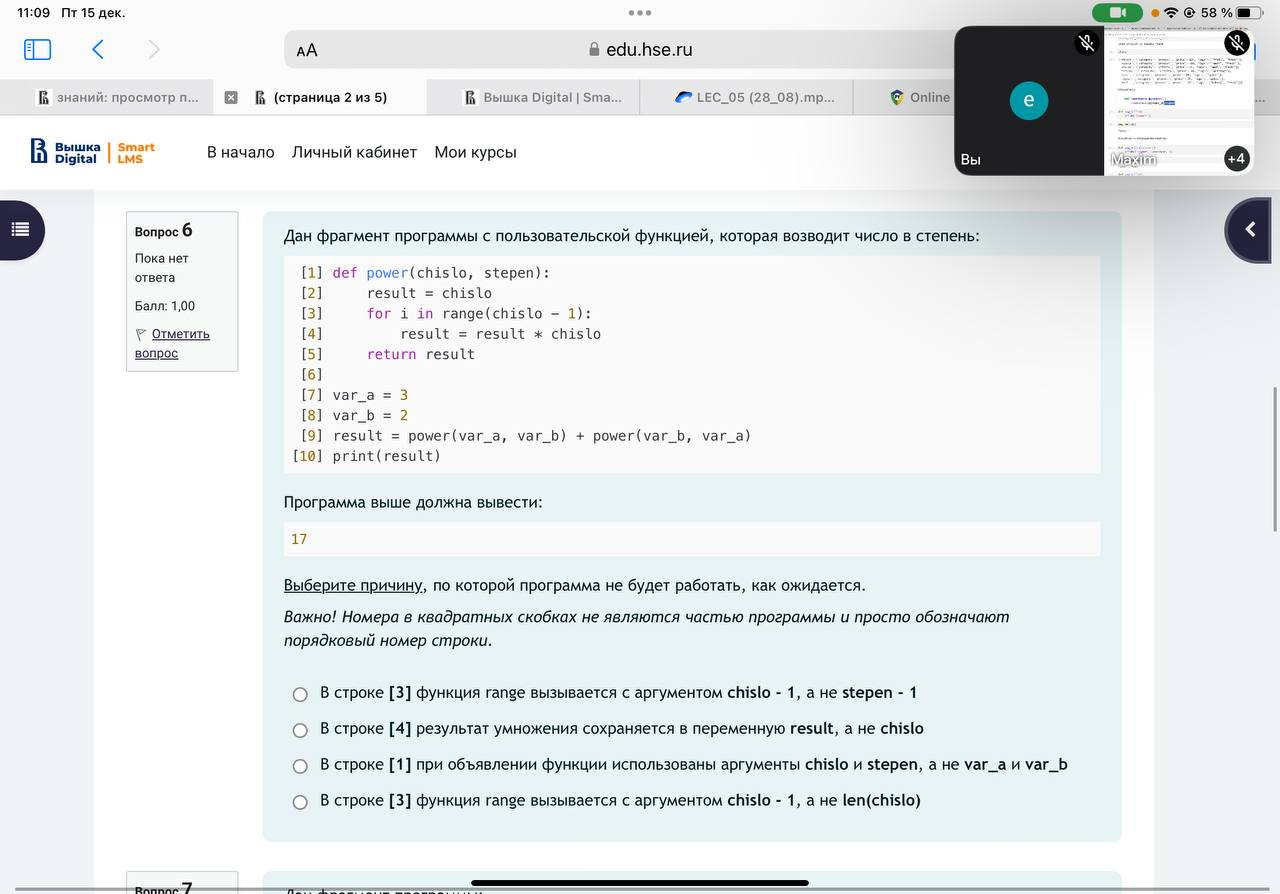

Функция вроде бы должна возводить число в степень, но выдаёт что-то не то

In [119]:
def power(chislo, stepen):
    result = chislo
    for i in range(chislo - 1):  
        result = result * chislo
    return result

var_a = 3
var_b = 2
result = power(var_a, var_b) + power(var_b, var_a)
print(result)  # ожидаем 17

31


In [122]:
print(power(2, 3))  # меньше, должно быть 8
print(power(4, 2))  # больше, должно быть 16

4
256


Разберёмся, как представить степень через умножения:

In [123]:
# функция возводит в куб
def cube(chislo):
    return chislo * chislo * chislo

print(cube(3))
print(cube(2))
print(cube(5))

27
8
125


In [124]:
# функция возводит в четвёртую степень

def to_4th_power(chislo):
    return chislo * chislo * chislo * chislo

print(to_4th_power(3))
print(to_4th_power(2))
print(to_4th_power(5))

81
16
625


В целом, когда нужно возвести число $x$ в степень $\text{stepen}$, нужно взять число и умножить на само себя $\text{stepen} - 1$ раз!

$x^2 = x * x$ (1 умножение)

$x^3 = x * x * x$ (2 умножения)

$x^4 = x * x * x * x$ (3 умножения)

...

$x ^ \text{stepen} = x * x * ... * x$ ($\text{stepen} - 1$ умножений)

Как повторить действие нужное число раз? Просто сделать цикл `for i in range(ЧИСЛО_РАЗ)`:

In [53]:
for i in range(2):
    print("выполняюсь")

выполняюсь
выполняюсь


In [54]:
for i in range(3):
    print("выполняюсь")

выполняюсь
выполняюсь
выполняюсь


Тогда итог такой:

- берём число `chislo`
- повторяем `stepen - 1` раз умножение числа на само себя (постоянно обновляем результат)

In [57]:
def to_any_power(chislo, stepen):
    result = chislo
    for i in range(stepen - 1):
        result = result * chislo
    return result

print(to_any_power(2, 4))
print(to_any_power(3, 3))

16
27


(если сначала взять не само число, а единицу, то тот же самый результат будет, если единицу умножить на нужное число $\text{stepen}$ раз:)

In [125]:
def to_any_power(chislo, stepen):
    result = 1
    for i in range(stepen):  # stepen, теперь не нужно stepen - 1
        result = result * chislo
    return result

print(to_any_power(2, 4))
print(to_any_power(3, 3))

16
27


**Ответ такой**: надо было `for i in range(stepen - 1):` а не `for i in range(chislo - 1):`

In [128]:
def power(chislo, stepen):
    result = chislo
    for i in range(stepen - 1):  # а не chislo-1
        result = result * chislo
    return result

var_a = 3
var_b = 2
result = power(var_a, var_b) + power(var_b, var_a)
print(result)  # ожидаем 17

17


## B последнее (написать функцию)

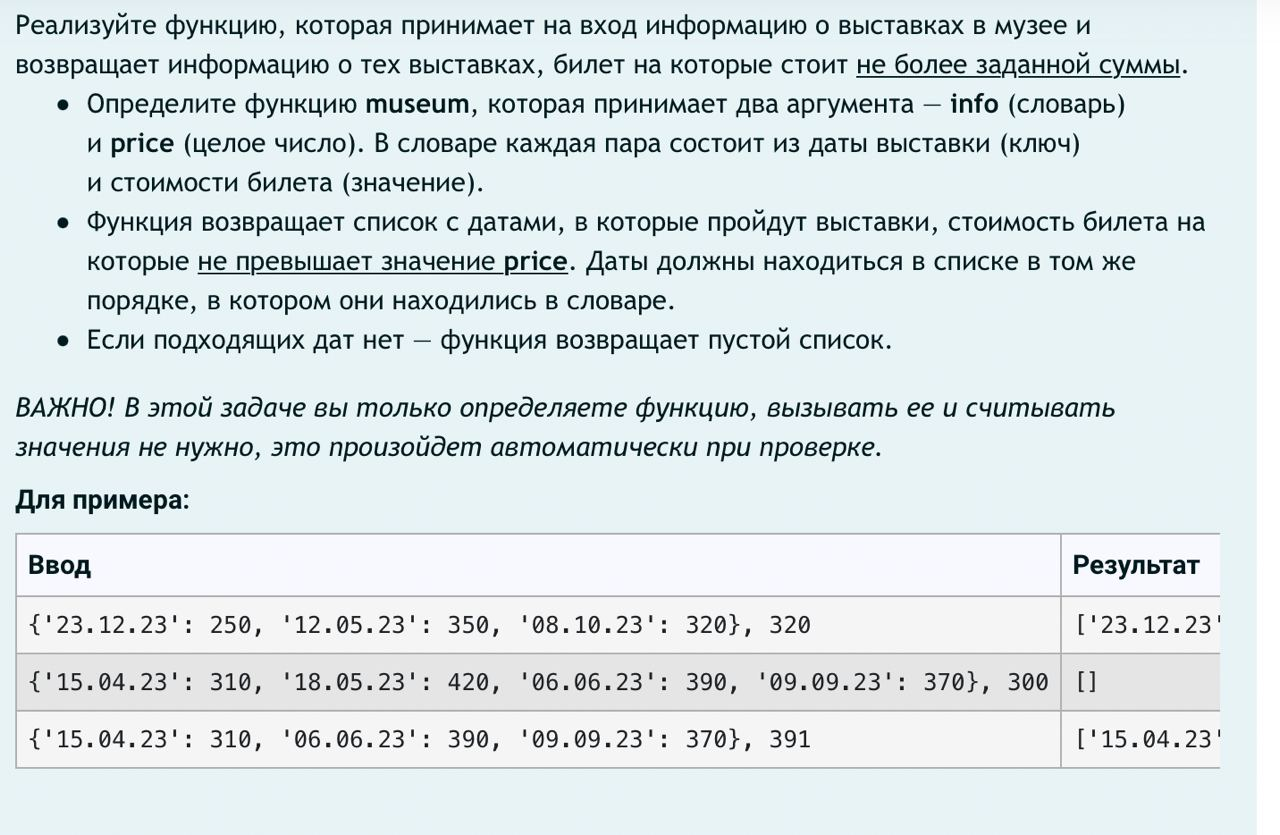

In [60]:
dates_1 = {"23.12.23": 250, "12.05.23": 350, "08.10.23": 320}


In [73]:
dates_price_under_300 = []

for date, price in dates_1.items():
    if price <= 300:
        dates_price_under_300.append(date)

print(dates_price_under_300)

['23.12.23']


In [76]:
def museum(info, price):
    dates_under_price = []
    for date, date_price in info.items():
        if date_price <= price:
            dates_under_price.append(date)
    return dates_under_price

In [75]:
museum(dates_1, 330)

['23.12.23', '08.10.23']

In [61]:
for key in dates_1:
    print(key)

23.12.23
12.05.23
08.10.23


In [62]:
for key in dates_1:
    # чтобы получить доступ к значению по этому ключу
    print(key, dates_1[key])

23.12.23 250
12.05.23 350
08.10.23 320


In [64]:
sorted(["Петя", "Вася"])

['Вася', 'Петя']

In [65]:
sorted(dates_1)

['08.10.23', '12.05.23', '23.12.23']

ключи получаются, когда мы обращаемся просто к словарю `dates_1`

Можно получить сразу и ключи и значения: `dates_1.items()`

In [67]:
for key, value in dates_1.items():
    print(key, value)

# аналогично
# for key in dates_1:
#     print(key, dates_1[key])

23.12.23 250
12.05.23 350
08.10.23 320


In [69]:
for date, price in dates_1.items():
    print(date, price)


23.12.23 250
12.05.23 350
08.10.23 320


In [68]:
list(dates_1.items())

[('23.12.23', 250), ('12.05.23', 350), ('08.10.23', 320)]

Можно получить только значения: `dates_1.values()`

In [71]:
list(dates_1.values())

[250, 350, 320]

In [72]:
sorted(dates_1.values())

[250, 320, 350]

## A6

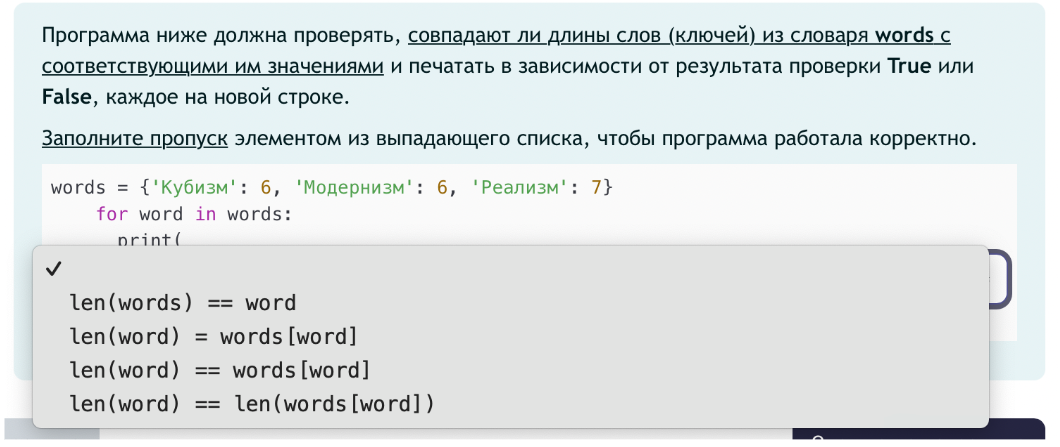

In [85]:
words = {"Кубизм": 6, "Модернизм": 6, "Реализм": 7}

for word in words:
    print(len(word) == words[word])

True
False
True


In [79]:
len("Модернизм") == 6

False

In [80]:
len("Модернизм") = 6

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2792075520.py, line 1)

## A5 — упорядочить строчки кода

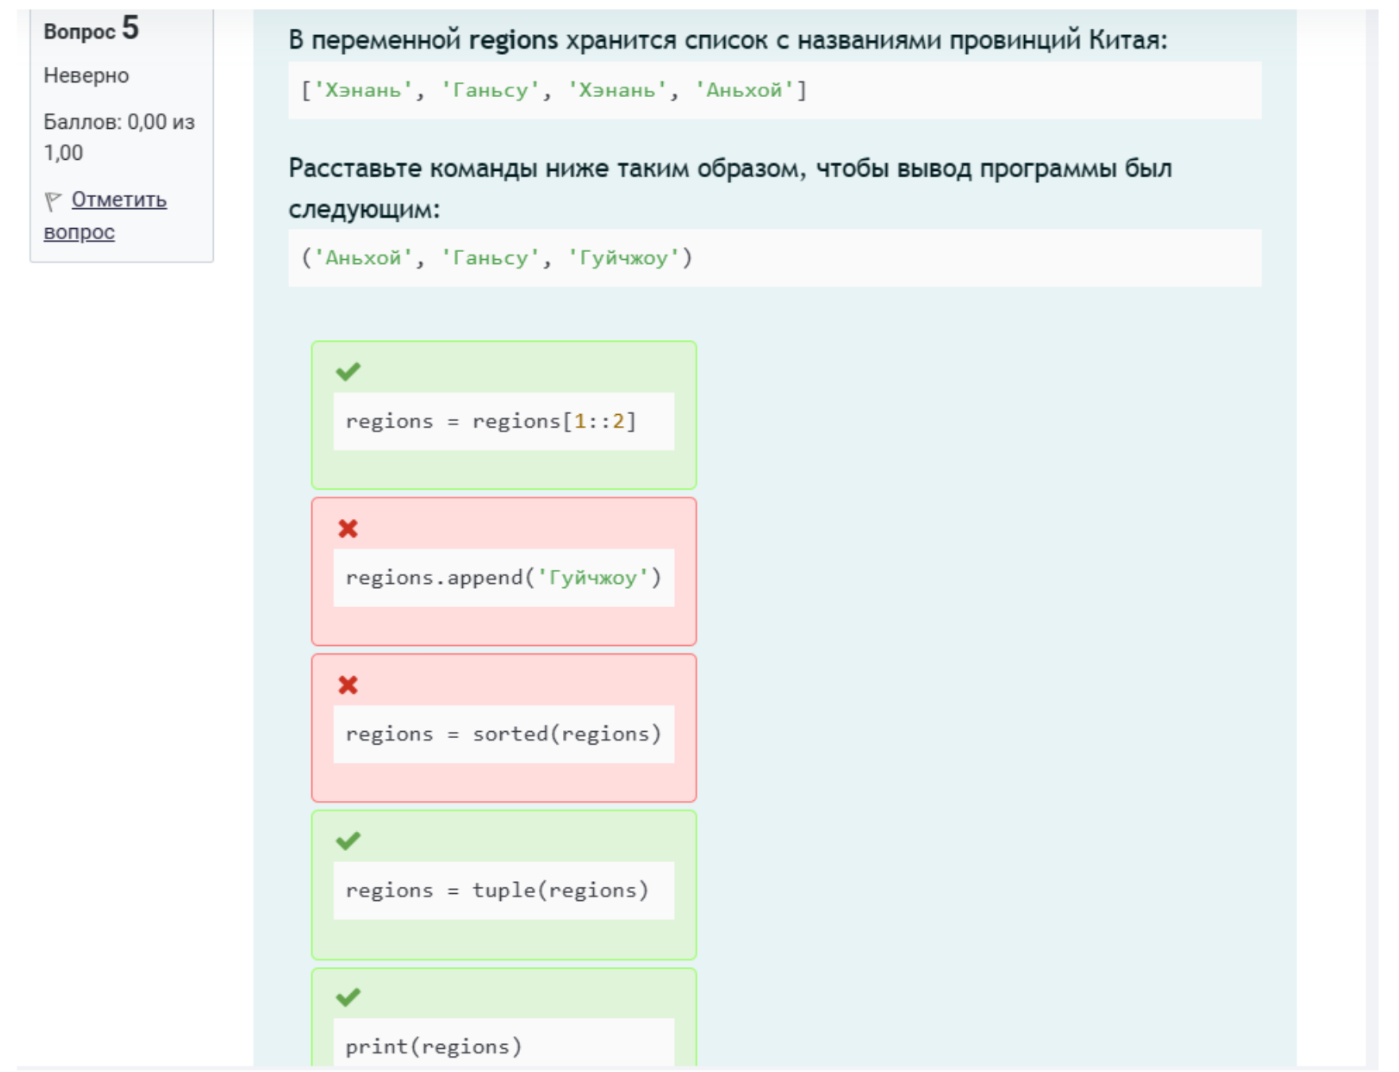

Видим несколько вещей:
- ответ кортеж, а не список
- элементы ответа в алфавитном порядке
- в ответе есть `Гуйчжоу`, который нужно добавить

In [98]:
regions = ["Хэнань", "Ганьсу", "Хэнань", "Аньхой"]
regions = regions[1::2]
regions.append("Гуйчжоу")
regions = sorted(regions)
regions = tuple(regions)
print(regions)


# ("Аньхой", "Ганьсу", "Гуйчжоу")

('Аньхой', 'Ганьсу', 'Гуйчжоу')


Важно, что `sorted()` из всего создаёт новый сортированный список 

In [96]:
sorted(regions, reverse=True)

['Гуйчжоу', 'Ганьсу', 'Аньхой']

In [111]:
sorted({"Таня", "Саня"})

['Саня', 'Таня']

In [95]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



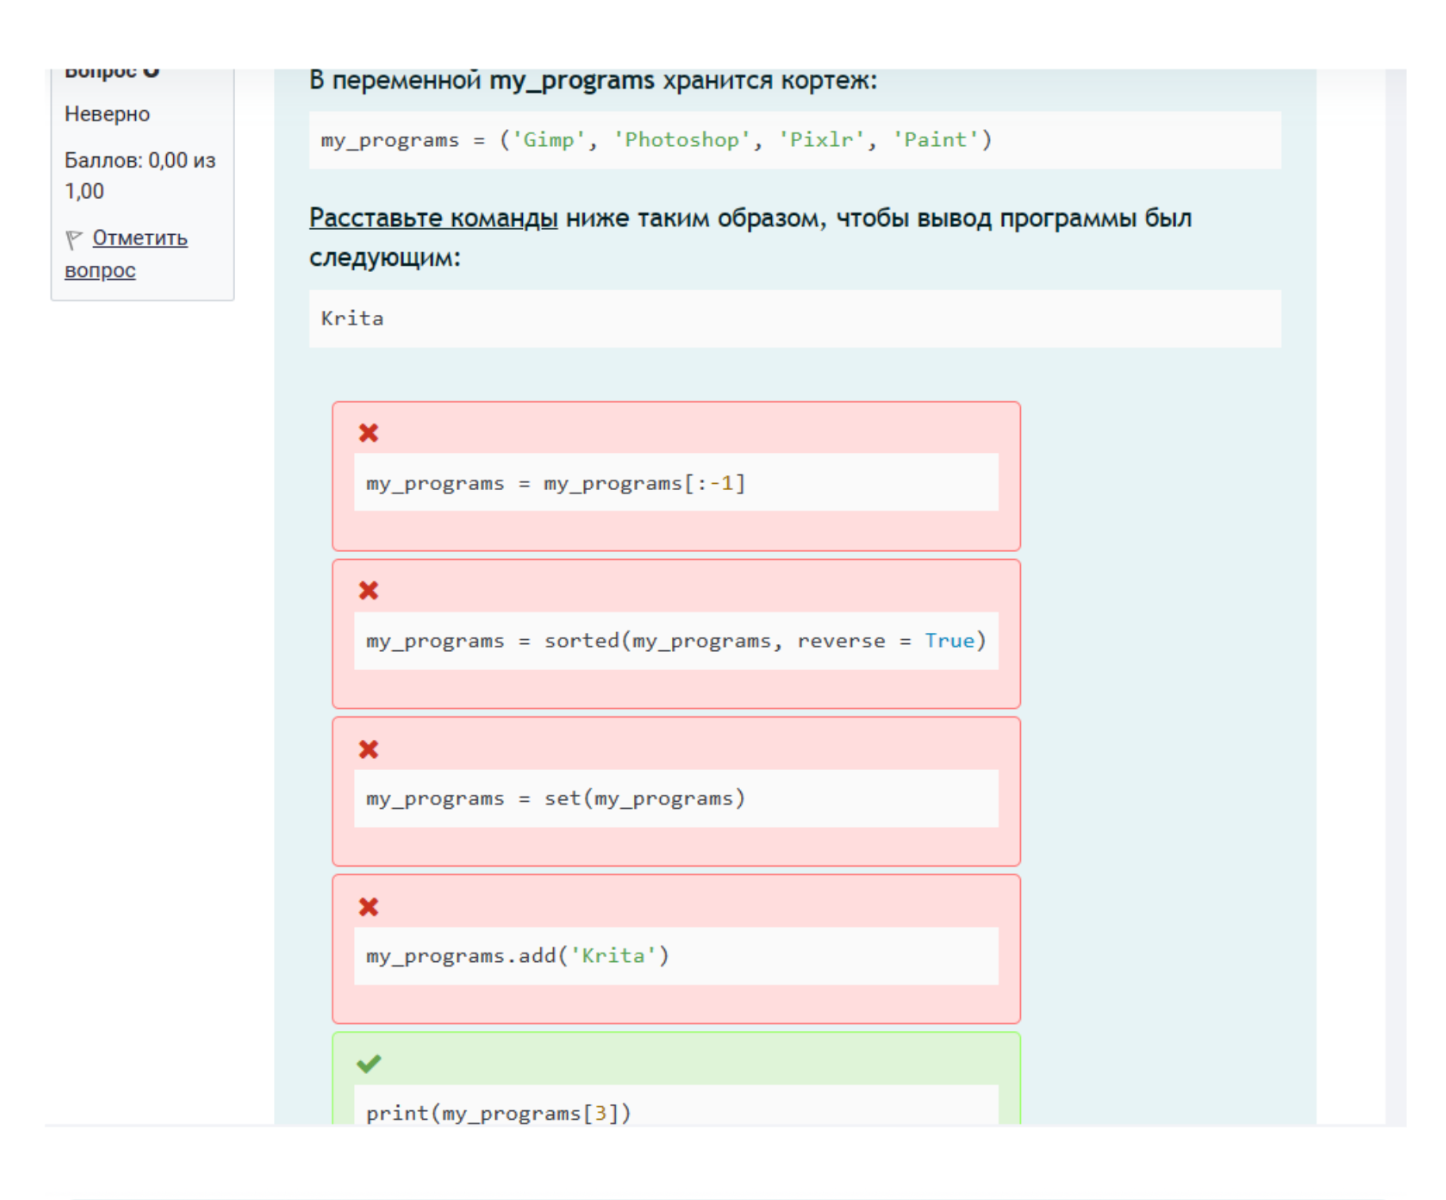

Важно, что `.add()` метод множества, обязательно нужно превратить кортеж во множество перед применением метода

In [112]:
my_programs = ("Gimp", "Photoshop", "Pixlr", "Paint")
my_programs = set(my_programs)
my_programs.add("Krita")
my_programs = sorted(my_programs, reverse=True)
my_programs = my_programs[:-1] # ничего не портит, удаляет последний элемент
print(my_programs[3])

Krita
